In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("Airbnb_Open_Data.xlsx", engine='openpyxl')

In [5]:
#Highest Average Prices by Neighborhood Group
print("\n Avg Price by Neighborhood Group:\n", df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False))


 Avg Price by Neighborhood Group:
 neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


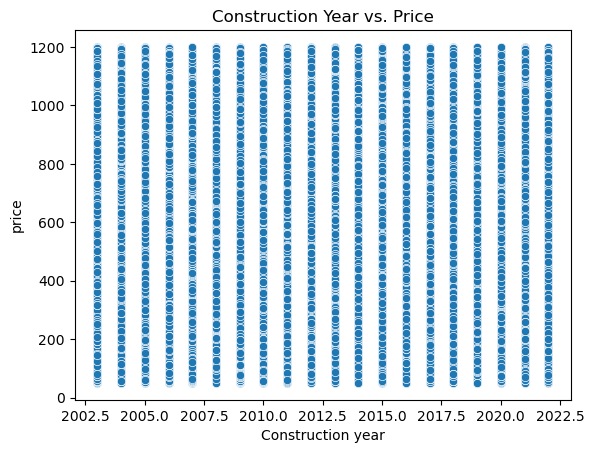

In [6]:
#Construction Year vs. Price
sns.scatterplot(data=df, x='Construction year', y='price')
plt.title("Construction Year vs. Price")
plt.show()

In [7]:
#Top 10 Hosts by Listing Count
print("\n Top 10 Hosts:\n", df['host id'].value_counts().head(10))


 Top 10 Hosts:
 host id
78730595133    2
50358760342    2
89461531863    2
86549670696    2
15675388930    2
41672437747    2
32502622332    2
2825302502     2
60984463763    2
39311001873    2
Name: count, dtype: int64


In [10]:
#Verified Identity vs. Positive Reviews
print("\n Verified Identity vs. Avg Review Score:\n", df.groupby('host_identity_verified')['review rate number'].mean())


 Verified Identity vs. Avg Review Score:
 host_identity_verified
unconfirmed    3.271767
verified       3.286684
Name: review rate number, dtype: float64


In [11]:
#Correlation Between Price and Service Fee
corr = df[['price', 'service fee']].corr().iloc[0,1]
print(f"\nCorrelation between Price and Service Fee: {corr:.2f}")


Correlation between Price and Service Fee: 1.00


In [12]:
#Avg Review Score by Neighborhood & Room Type
print("\n Avg Review Score by Neighborhood & Room Type:\n", df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack())


 Avg Review Score by Neighborhood & Room Type:
 room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                       3.346457         NaN      3.329706     3.264957
Brooklyn                    3.250378        3.75      3.264465     3.336983
Manhattan                   3.275807        3.50      3.277576     3.257459
Queens                      3.349154        3.75      3.315585     3.377778
Staten Island               3.329087         NaN      3.479482     3.533333
brookln                          NaN         NaN      4.000000          NaN
manhatan                         NaN         NaN      3.000000          NaN


In [13]:
#Avg Price by Room Type
print("\n Avg Price by Room Type:\n", df.groupby('room type')['price'].mean())


 Avg Price by Room Type:
 room type
Entire home/apt    625.082232
Hotel room         668.465517
Private room       625.007363
Shared room        634.132101
Name: price, dtype: float64


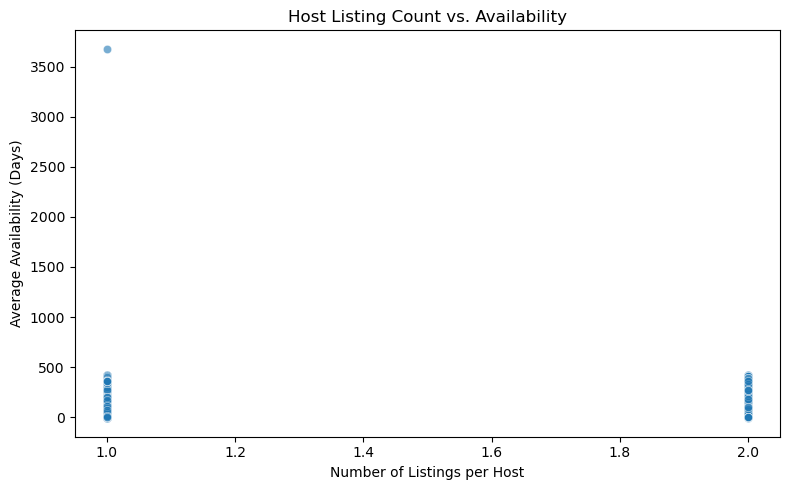

In [15]:
#Host Listing Count vs. Availability
host_counts = df['host id'].value_counts()
host_availability = df.groupby('host id')['availability 365'].mean()

# Merge into a single DataFrame
merged = pd.DataFrame({
    'listing_count': host_counts,
    'avg_availability': host_availability
}).reset_index(drop=True)

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged, x='listing_count', y='avg_availability', alpha=0.6)
plt.title("Host Listing Count vs. Availability")
plt.xlabel("Number of Listings per Host")
plt.ylabel("Average Availability (Days)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load the dataset ---
df = pd.read_excel("Airbnb_Open_Data.xlsx", engine='openpyxl')  # Ensure openpyxl is installed

# --- User Inputs ---
neighborhood = input("Enter a neighborhood group (e.g., Downtown, Suburb, Beachside, Historic): ")
room_type = input("Enter a room type (Entire home/apt, Private room, Hotel room, Shared room): ")
identity_status = input("Enter host identity status (verified/unverified): ")

# --- Filtered Data ---
filtered_df = df[
    (df['neighbourhood group'] == neighborhood) &
    (df['room type'] == room_type) &
    (df['host_identity_verified'] == identity_status)
]

print(f"\n🔍 Showing results for: {neighborhood} | {room_type} | {identity_status}")
print(f"Total listings found: {len(filtered_df)}")

# --- Price Summary ---
print("\nPrice Summary:")
print(filtered_df['price'].describe())

# --- Review Score Summary ---
print("\nReview Score Summary:")
print(filtered_df['review rate number'].describe())

# --- Availability Summary ---
print("\nAvailability Summary:")
print(filtered_df['availability 365'].describe())

# --- Visualization: Price vs. Review Score ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_df, x='price', y='review rate number', alpha=0.6)
plt.title("Price vs. Review Score")
plt.xlabel("Price")
plt.ylabel("Review Score")
plt.tight_layout()
plt.show()